# Ch10 Neural Nets with Keras

**인공신경망(artificial neural network)(ANN)**: 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델<br>
-> 이는 다재다능함, 강력함, 확장성 좋음

In [2]:
import pandas as pd
import numpy as np
import os

import sklearn
assert sklearn.__version__ >= "0.20"

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

# 10.1 생물학적 뉴런에서 인공 뉴런까지

최초의 인경 신경망 구조: 명제 논리를 사용해 동물 뇌의 생물학적 뉴런이 복잡한 계산을 위해 어떻게 상호작용하는지에 대한 간단한 계산 모델 제시

최근 인공 신경망이 우리 생활에 커다란 영향을 줄 것이라는 근거
- 신경망을 훈련하기 위한 데이터가 엄청나게 많아짐
- 1990년대 이후 컴퓨터 하드웨어가 크게 발전
- 훈련 알고리즘 향상
- 일부 인공 신경망의 이론상 제한이 실전에서는 문제가 되지 않는다 밝혀짐
- 인공 신경망이 투자와 진보의 선순환에 들어감

## 10.1.1 생물학적 뉴런

생물학적 신경망(biological neural network)(BNN) 

## 10.1.2 뉴런을 사용한 논리 연산

인공 뉴런(artificial neuron): 생물학적 뉴런에서 착안한 매우 단순한 신경망 모델<br>
- 하나 이상의 이진(on/off) 입력과 이진 출력 하나를 가짐
- 단순히 입력이 일정 개수만큼 활성화되었을 때 출력을 내보냄
- 인공 뉴런의 네트워크를 만들어 어떤 논리 명제도 계산할 수 있다는 것을 증명

## 10.1.3 퍼셉트론

**퍼셉트론(perceptron)**: 가장 간단한 인공 신경망 구조 중 하나<br>
TLU(threshold logic unit) 또는 LTU(linear threshold unit)라고 불리는 조금 다른 형태의 인공 뉴런을 기반으로 함<br>
-> 입력과 출력이 이진이 아닌 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있음



TLU는 입력의 가중치 합을 계산한 뒤 계산된 합에 **계단 함수**(step function)을 적용하여 결과 출력

**헤비사이드 계단 함수**(Heaviside step function): 퍼셉트론에서 가장 널리 사용되는 계단함수<br>
$heaviside(z)= \begin{cases}0&z<0\\ 1&z\geq 0\end{cases} , \  \  sgn(z)=\begin{cases}-1&z<0\\ 0&z=0\\ +1&z>0\end{cases} $

하나의 TLU는 간단한 선형 이진 분류 문제에 사용할 수 있음<br>
i) 입력의 선형 조합을 계산해서 그 결과가 임곗값을 넘으면 양성 클래스 출력<br>
ii) 그렇지 않으면 음성 클래스 출력

퍼셉트론은 층이 하나뿐인 TLU로 구성. 각 TLU는 모든 입력에 연결되어 있음<br>
**완전 연결 층**(fully connected layer) 또는 **밀집층**(dense layer): 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때의 층<br>
**입력 뉴런**(input neuron): 퍼셉트론의 입력이 주입되는 곳<br>
-> 이 뉴런은 어떤 입력이 주입되든 그냥 출력으로 통과<br>
**입력층**(input layer): 모두 입력 뉴런을 구성, 보통 거기에 **편향** 특성이 더해짐<br>
=> 전형적으로 이 편향 특성은 항상 1을 출력하는 특별한 종류의 뉴런인 **편향 뉴런**(bias neuron)으로 표현

** 예시: 입력 2개, 출력 3개로 구성된 퍼셉트론<br>
        해당 퍼셉트론은 샘플을 세 개의 다른 이진 클래스로 동시에 분류할 수 있으므로 다중 레이블 분류기(multilabel classifier)

선형 대수 이용하여 한 번에 여러 샘플에 대해 인공 뉴런 층 출력 계산<br>
`완전 연결층의  출력 계산`<br>
$\  \  h_{\mathbf{W} ,b}(\mathbf{X} )=\phi (\mathbf{X} \mathbf{W} +\mathbf{b} )$
- $\mathbf{X}$는 입력 특성의 행렬 나타냄. 행: 샘플, 열: 특성
- 가중치 행렬 $\mathbf{W}$는 편향 뉴런을 제외한 모든 연결 가중치 포함. 이 행렬의 행은 입력 뉴런에 해당하고 열은 출력층에 있는 인공 뉴런에 해당.
- 편향 벡터 $\mathbf{b}$는 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치 포함. 인공 뉴런마다 하나의 편향값 있음
- $\phi$는 활성화 함수(activation function). 인공 뉴런이 TLU인 경우 이 함수는 계단 함수(step function)

퍼셉트론 훈련 방법<br>
-> 헤브의 규칙(Hebb's Rule)에 영감 받음 <br>
=> 헤브의 규칙: 두 뉴런이 동시에 활성화될 때마다 이들 사이의 연결 가중치가 증가하는 경향이 있다.
- 퍼셉트론은 네트워크가 예측할 때 만드는 오차를 반영하도록 조금 변형된 규칙을 사용하여 훈련됨
- 퍼셉트론 학습 규칙은 오차가 감소되도록 연결을 강화 (퍼셉트론 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어짐)
- 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 연결된 가중치 강화

`퍼셉트론 학습 규칙`<br>
$w^{(next \ step)}_{i,j} \ = \ w_{i,j} \ + \ \eta (y_{j}-\hat{y_{j}})x_{i}$<br>
- $w_{i,j}$는 $i$번째 입력 뉴런과 $j$번째 출력 뉴런 사이를 연결하는 가중치
- $x_i$는 현재 훈련 샘플의 $i$번째 뉴런의 입력값
- $\hat{y_j}$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 출력값
- $y_j$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 타깃값
- \eta는 학습률

**퍼셉트론 수렴 이론**(perceptron convergence)<Br>
: 각 출력 뉴런의 결정 경계는 선형이므로 퍼셉트론도 복잡한 패턴을 학습하지 못함. 하지만 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 이론

사이킷런은 하나의 TLU 네트워크를 구현한 Perceptron 클래스 제공

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

=> 퍼셉트론 학습 알고리즘이 확률적 경사 하강법과 유사함을 볼 수 있음<br>
사이킷런의 Perceptron 클래스는 매개변수가 `loss="perceptron, learning_rate="constant, eta0=1(학습률), penalty=None(규제없음)`인 SGDClassifier와 같음<br>
logistic regression classifier와 달리 perceptron은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만듦 => 퍼셉트론보다 로지스틱 회귀가 더 선호

**다층 퍼셉트론**(MLP): 퍼셉트론을 여러 개 쌓아올려 일부 제약을 줄인 인공 신경망<br>
-> 다층 퍼셉트론은 XOR 문제를 풀 수 있음

## 10.1.4 다층 퍼셉트론과 역전파

**다층 퍼셉트론**(MLP)은 (통과)**입력층**(input layer) 하나와 **은닉층**(hidden layer)이라 불리는 하나 이상의 TLU층과 마지막 **출력층**(output layer)로 구성<br>
입력층과 가까운 층을 보통 하위층(lower layer), 출력에 가까운 층을 상위층(upper layer)<br>
출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어있음

**심층 신경망**(deep neural network)(DNN): 은닉층을 여러 개 쌓아 올린 인공 신경망<br>
-> 딥러닝은 심층 신경망을 연구하는 분야이며 조금 더 일반적으로는 연산이 연속하여 길게 연결된 모델 연구

**역전파**(backpropagation) 훈련 알고리즘: 효율적인 기법으로 그레이디언트를 자동으로 계산하는 경사 하강법 <br>
=> 네트워크를 두 번(정방향 한 번, 역방향 한 번) 통과하는 것만으로 역전파 알고리즘은 모든 모델 파라미터에 대한 네트워크 오차의 그레이디언트를 계산할 수 있음. 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있음.

1. 한 번에 하나의 미니 배치씩 진행. 전체 훈련 세트를 처리. 이를 여러 번 반복 (여기서 반복을 에포크(epoch)라 함)
2. 각 미니배치는 네트워크의 입력층으로 전달되어 첫 번째 은닉층으로 보내짐
3. 그다음 (미니 매치에 있는 모든 샘플에 대해) 해당 층에 있는 모든 뉴런의 출력 계산
이 결과는 다음 층으로 전달<br>
다시 이 층의 출력을 계산하고 결과는 다음 층으로 전달<br>
이런 식으로 마지막 층인 출력층의 출력을 계산할 때까지 계속 진행됨<br>
=> 이를 **정방향 계산**(forward pass)이라 함
4. 그다음 알고리즘이 네트워크의 출력 오차 측정 (손실 함수를 사용하여 기대하는 출력과 네트워크의 실제 출력을 비교하고 오차 측정 값 반환)
5. 각 출력 연결이 이 오차에 기여하는 정도를 계산 (연쇄 법칙(chain rule) 적용하면 빠르고 정확히 수행 가능)
6. 이 알고리즘은 또 다시 연쇄 법칙을 사용하여 이전 층의 연결 가중치가 이 오차의 기여 정도에 얼마나 기여했는지 측정<Br>
이는 입력층에 도달할 때까지 역방향으로 계속됨
7. 마지막으로 경사 하강법을 수행하여 방금 계산한 오차 그레이디언트를 사용해 네트워크에 있는 모든 연결 가중치를 수정



**정리**<br>
각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 (정방향 계산) 오차 측정 -> 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정 (역방향 계산) -> 이 오차가 감소하도록 가중치 조절 (경사 하강법 단계)

주의) 은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요

이 알고리즘을 잘 작도하기 위해 다층 퍼셉트론 구조에 중요한 변화를 주었음 => **계단 함수를 로지스틱 함수로 바꿈**<br>
: 계단 함수는 수평선 뿐이라 계산할 그레이디언트가 없음. 반면 로지스틱 함수는 어디서든지 0이 아닌 그레이디언트가 잘 정의되어있음<Br><br>

** 로지스틱 함수 외에 이용할 수 있는 다른 활성화 함수
- 하이퍼볼릭 탄젠트 함수 (쌍곡 탄젠트 함수)
- ReLU 함수

** 활성화 함수를 필요한 이유<br>
=> 만약 선형 변환을 여러 개 연결하여도 얻는 것은 선형 변환 뿐. 따라서 층 사이에 비선형성을 추가하지 않으면 아무리 층을 많이 쌓아도 하나의 층과 동일해짐.

## 10.1.5 회귀를 위한 다층 퍼셉트론

다층 퍼셉트론은 **회귀 작업**에서 사용 가능<br>
값 하나를 예측하는 데에는 출력 뉴런 하나만 필요. 이 때 뉴런의 출력이 예측된 값.<br>
**다변량 회귀**(multivariate regression)에서는 동시에 여러 값을 예측하기 때문에 출력 차원마다 출력 뉴런이 하나씩 필요

일반적으로 회귀용 다층 퍼셉트론을 만들 때 출력 뉴런에 활성화 함수 사용하지 않고 어떤 범위의 값도 출력되도록 함<br>
i) 출력이 항상 양수여야할 때: 출력층에 ReLU 활성화 함수 사용, 또는 softplus 활성화 함수 사용<br>
** softplus 함수: $z$가 음수일 때 0에 가까워지고 $z$가 큰 양수일수록 $z$에 가까움<br>
ii) 어떤 범위 안의 값을 예측하고 싶을 때: 로지스틱 함수(0 ~ 1) 또는 하이퍼볼릭 탄젠트 함수(-1 ~ 1)를 사용하여 레이블의 스케일을 적절한 범위로 조정

훈련에 사용하는 손실함수: 전형적으로 평균 제곱 오차<br>
if 훈련 세트에 이상치가 많다면 평균 절댓값 오차 사용<bR>
혹은 이 둘을 조합한 후버(Huber) 손실 사용 (후버손실: 오차가 임계값보다 작을 때 이차함수, 클 때 선형 함수)

회귀 MLP의 전형적인 구조

|하이퍼파라미터  |일반적인 값  |
|------|---|
|입력 뉴런 수|특성마다 하나|
|은닉층 수 |문제에 따라 다름, 일반적으로 1에서 5 사이|
|은닉층의 뉴런 수|문제에 따라 다름, 일반적으로 10에서 100 사이|
|출력 뉴런 수|예측 차원마다 하나|
|은닉층의 활성화 함수|ReLU (또는 SELU)|
|출력층의 활성화 함수|없음, 또는 (출력 양수) ReLU/softplus, 또는 (출력 범위) logistic/tanh 사용|
|손실 함수|MSE나 (이상치 있다면)MAE/Huber|

## 10.1.6 분류를 위한 다층 퍼셉트론

다층 퍼셉트론은 **분류** 작업에도 사용 가능<br>
다층 퍼셉트론은 다중 레이블 이진 분류(multilabel binary classification) 문제 쉽게 처리 가능<br>
손실 함수는 확률 분포를 예측해야 하므로 일반적으로 크로스 엔트로피 손실(cross-entropy loss)(또는 로그 손실(log loss)라고도 부름) 사용하는 것이 좋음

분류 MLP의 전형적인 구조

|하이퍼파라미터  |이진 분류  | 다중 레이블 분류 | 다중 분류|
|------|---|---|---|
|입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일|
|출력 뉴런 수|1개|레이블마다 1개|클래스마다 1개|
|출력층의 활성화 함수|로지스틱 함수|로지스틱 함수|소프트맥스 함수|
|손실 함수|크로스 엔트로피|크로스 엔트로피|크로스 엔트로피|


# 10.2 케라스로 다층 퍼셉트론 구현하기

케라스(Keras)는 모든 종류의 신경망을 손쉽게 만들고 훈련, 평가, 실행할 수 있는 고수준 딥러닝 API

## 10.2.1 Tensorflow2 설치

** local에서의 설치 실패 => colab 이용

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
!python -m pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 54.2 MB/s 
     |████████████████████████████████| 438 kB 59.2 MB/s 
     |████████████████████████████████| 5.9 MB 59.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [6]:
print(tf.__version__)
print(keras.__version__)

2.9.2
2.9.0


## 10.2.2 시퀀셜 API 사용하여 이미지 분류기 만들기

패션(Fashion) MNIST 데이터셋 사용

### 케라스 사용하여 데이터셋 적재

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


28 x 28 크기의 배열:

In [8]:
X_train_full.shape

(60000, 28, 28)

각 픽셀의 강도는 바이트(0~255)로 표현:

In [9]:
X_train_full.dtype

dtype('uint8')

검증 세트 만들기, 경사 하강법으로 신경망을 훈련하기 때문에 입력 특성 스케일 조정

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

MNIST는 레이블에 해당하는 아이템을 나타내기 위해 클래스 이름의 리스트 필요:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

검증 세트는 5,000개의 이미지, 테스트 세트는 10,000개의 이미지:

In [13]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


해당 데이터셋에 있는 샘플 이미지를 몇 개 출력해보기

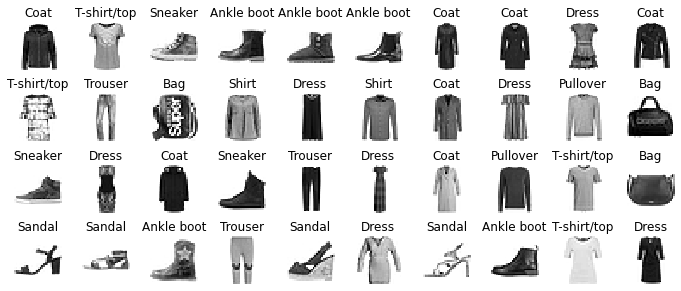

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 시퀀셜 API 사용하여 모델 만들기

두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- 첫 번째 라인: Sequential 모델 생성. 순서대로 연결된 층을 일렬로 쌓아서 구성.
- 첫 번째 층을 만들고 모델에 추가<br>
Flatten층은 입력 이미지를 1D 배열로 변환. 이 층은 어떤 모델 파라미터도 가지지 않고 간단한 전처리 수행<br>
모델의 첫 번째 층이므로 `input_shape` 지정 (여기에는 배치 크기 제외하고 샘플 크기만을 써야함)
- 그다음 뉴런 300개 가진 Dense 은닉층 추가. ReLU 활성화 함수 사용. Dense 층마다 각자 가중치 행렬 관리. 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함. 또한 (뉴런마다 하나씩 있는) 편향도 벡터로 관리. 
- 다음 뉴런 100개를 가진 두 번째 Dense 은닉층 추가. ReLU 활성화 함수 사용.
- (클래스마다 하나씩) 뉴런 10개를 가진 Dense 출력층 추가. (배타적인 클래스이므로) softmax 활성화 함수 사용.

층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있음

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

모델의 summary() 메서드는 모델에 있는 모든 층 출력<br>
각 층의 이름, 출력 크기, 파라미터 개수가 출력<br>
마지막에 훈련되는 파라미터와 훈련되지 않은 파라미터를 포함하여 전체 파라미터 개수를 출력

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


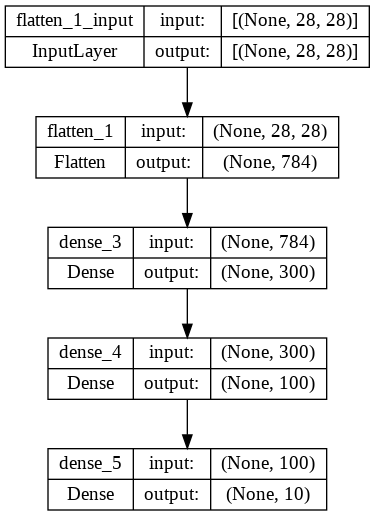

In [18]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]

In [21]:
hidden1.name

'dense_3'

In [22]:
model.get_layer('dense_3') is hidden1

True

층의 모든 파라미터는 `get_weights()` 메서드와 `set_weights()` 메서드를 사용해 접근할 수 있음<br>
Dense 층의 경우 연결 가중치와 편향이 모두 포함되어있음

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.03679361,  0.02449588,  0.01850631, ..., -0.05402065,
        -0.0122071 , -0.06754796],
       [ 0.03858304, -0.00970447,  0.0408879 , ...,  0.00285714,
        -0.03792779, -0.05684216],
       [ 0.03436922,  0.04596813, -0.05064642, ..., -0.03903211,
        -0.03777237, -0.0297312 ],
       ...,
       [-0.02302483, -0.06101149, -0.03124358, ...,  0.02439407,
         0.00678386, -0.02166727],
       [ 0.03184228, -0.00485849,  0.01837264, ..., -0.02474777,
         0.00437061,  0.0317338 ],
       [-0.05424199,  0.04803835,  0.05423401, ...,  0.00971263,
         0.0488781 , -0.05767034]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

Dense 층은 연결 가중치를 무작위로 초기화함. 편향은 0으로 초기화함.<Br>
따른 초기화 방법을 사용하고 싶을 때는 층을 만들 때 `kernel_initializer`와 `bias_initializer` 매개변수 설정

** 가중치 행렬의 크기는 입력 크기에 달려 있음. 이 때문에 Sequential 모델에 첫 번째 층을 추가할 때 `input_shape` 매개변수 지정한 것. <br>
하지만 입력 크기를 지정하지 않아도 괜찮음. Keras는 모델을 빌드하기 전까지 입력 크기를 기다릴 것. 모델 빌드는 실제 데이터를 주입할 때 또는 `build()` 메서드 호출할 때 일어남.<br>
모델이 실제로 빌드되기 전에 층이 가중치를 가지지 않으면 `summary()` 메서드 호출이나 모델 저장 등의 특정 작업을 수행할 수 없음. 따라서 모델을 만들 때 입력 크기를 알고 있다면 지정하는 것이 좋음.

### 모델 컴파일



모델을 만들고 나서 `compile()` 메서드를 호출하여 사용할 손실함수와 옵티마이저(optimizer)를 지정해야함

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) 

-  레이블이 정수 하나로 이루어져 있고 클래스가 배타적이므로 `"sparse_categorical_crossentropy"` 손실 사용 (만약 샘플마다 클래스 별 타깃 확률을 가지고 있다면 `"categorical_crossentropy"` 손실 사용<br>
(이진 분류나 다중 레이블 이진 분류를 수행한다면 출력층에 `"softmax"` 대신 `"sigmoid"` 함수 사용하고 `"binary_crossentropy"` 손실 사용
- optimizer에 `"sgd"`를 지정하면 기본 확률적 경사 하강법(stochastic gradient descent)을 사용하여 모델 훈련한다는 의미 => 역전파 알고리즘 수행<br>
(sgd optimizer 사용할 때는 학습률을 튜닝하는 것이 중요. 기본값으로 lr=0.01 사용)
- 분류기이므로 훈련과 평가 시에 정확도를 측정하기 위해 `"accuracy"` 지정

### 모델 훈련과 평가

모델을 훈련하려면 간단하게 `fit()` 메서드 호출

In [29]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1698/1719 [============================>.] - ETA: 0s - loss: 0.7275 - accuracy: 0.7573

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7258 - accuracy: 0.7577 - val_loss: 0.5251 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4937 - accuracy: 0.8297 - val_loss: 0.4529 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4480 - accuracy: 0.8432 - val_loss: 0.4312 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4217 - accuracy: 0.8513 - val_loss: 0.3983 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4012 - accurac

- 입력 특성(X_train), 타깃 클래스(y_train), 훈련할 에포크 수 전달
- 검증 세트 전달 (이는 선택 사항)
- Keras는 에포크가 끝날 때마다 검증 세트를 사용해 손실과 추가적인 측정 지표 계산<br> 이 지표는 모델이 얼마나 잘 수행되는지 확인하는데 유용
- 훈련 세트 성능이 검증 세트보다 월등히 높다면 아마도 모델이 훈련 세트에 과대적합 되었을 것
- 훈련 에포크마다 케라스는 처리한 샘플 개수와 걸린 평균 훈련 시간, 훈련 세트와 검증 세트에 대한 손실과 정확도를 출력
- 훈련 손실이 감소하고 있으므로 좋은 신호임!

i) 어떤 클래스는 많이 등장하고 다른 클래스는 조금 등장하여 훈련 세트가 편중되어 있다면 `fit()` 메서드를 호출할 때 `class_weight` 매개변수 지정하는 것이 좋음. 이는 적게 등장하는 클래스에 높은 가중치, 많이 등장하는 클래스에는 낮은 가중치 부여.<br>
ii) 샘플별로 가중치 부여하고 싶다면 `sample_weight` 매개변수 지정

`fit()` 메서드가 반환하는 History 객체에는 훈련 파라미터(`history.params`), 수행된 에프크 리스트(`history.epoch`) 포함.<br>
가장 중요한 속성은 에포크가 끝날 때마다 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리(`history.history`)임!

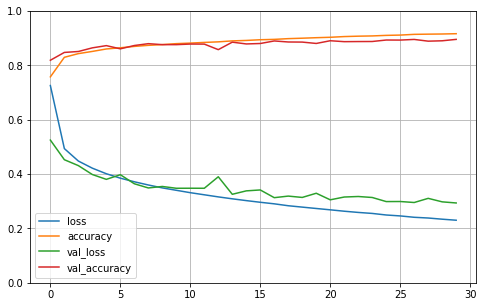

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- 훈련하는 동안 훈련 정확도와 검증 정확도가 꾸준히 상승
- 훈련 손실과 검증 손실은 감소
- 검증 곡선이 훈련 곡선과 가까움 => 과대적합되지 않았다는 증거
- 훈련 손실은 에포크가 진행되는 동안 계산되기 때문에 훈련 곡선을 볼 때는 왼쪽으로 에포크의 절반만큼 이동해서 생각하자!

만약 모델의 성능이 만족스럽지 않다면 처음으로 되돌아가서 하이퍼파라미터 튜닝해야함.
1. 처음 확인할 것은 학습률
2. 학습률이 도움되지 않는다면 다른 optimizer 테스트 (항상 다른 하이퍼파라미터를 바꾼 후에는 학습률을 다시 튜닝해야함)
3. 여전히 성능이 높지 않으면 층 개수, 층에 있는 뉴런 개수, 은닉층이 사용하는 활성화 함수와 같은 모델의 하이퍼파라미터 튜닝해보기
4. `batch_size`와 같은 다른 하이퍼파라미터 튜닝

모델의 검증 정확도가 만족스럽다면 테스트 세트로 모델을 평가하여 일반화 오차를 추정해야함. `evaluate()` 메서드 사용.

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8813


[0.33200815320014954, 0.8812999725341797]

### 모델을 사용해 예측을 만들기

모델의 `predict()` 메서드 사용하여 새로운 샘플에 대해 예측 만들기

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 350ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 11ms/step


array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

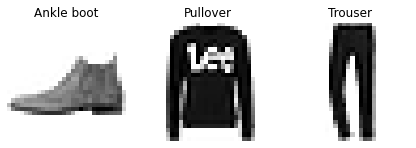

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

캘리포니아 주택 가격 데이터셋 사용하여 회귀 신경망으로 이를 해결해보기

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

시퀀셜 API 사용하여 회귀용 MLP를 구축, 훈련, 평가, 예측하는 방법은 분류에서와 유사<br><br>

**주된 차이점**
- 출력층이 활성화 함수가 없는 하나의 뉴런(하나의 값을 예측하기 때문)을 가진다는 것
- 손실 함수로 평균 제곱 오차 사용

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # 새로운 샘플
y_pred = model.predict(X_new)

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
322/363 [=========================>....] - ETA: 0s - loss: 1.7430

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 44ms/step


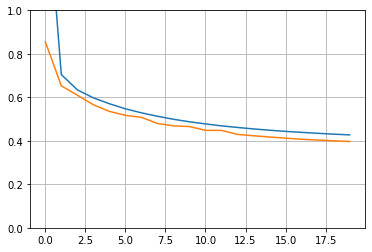

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Sequential 모델이 널리 사용되지만 입력과 출력이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야할 때는 Keras의 함수형(functional) API 사용

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

순차적이지 않은 신경망의 예: 와이드&딥 신경망<Br>
이는 입력의 일부 또는 전체가 출력층에 바로 연결. 이 구조를 사용하면 신경망이 (깊게 쌓은 층을 사용한) 복잡한 패턴과 (짧은 경로를 사용한) 간단한 규칙 모두를 학습 가능<br>
(이와 대조적으로 일반적인 MLP는 네트워크에 있는 층 전체에 모든 데이터를 통과시킴)

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

- 먼저 Input 객체 만들기. 이 객체는 shape와 dtype 포함하여 모델의 입력 정의. 한 모델은 여러 개의 입력을 가질 수 있음.
- 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층 만듦. 이 층은 만들어지자마자 입력과 함께 함수처럼 호출됨.(이러한 이유로 함수형 API라 부름)(케라스에 층이 연결될 방법을 알려주었을 뿐 아직 어떤 데이터도 처리하지 않았음)
- 두 번째 은닉층을 만들고 함수처럼 호출
- Concatenate 층을 만들고 또 다시 함수처럼 호출하여 두 번째 은닉층의 출력과 입력을 연결
- 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용하여 호출
- 마지막으로 사용할 입력과 출력을 지정하여 케라스 Model 만듦

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
334/363 [==========================>...] - ETA: 0s - loss: 1.9738

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 1ms/step - loss: 1.8772 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6501 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6012 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5654 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5414 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5181 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 41ms/step


만약 일부 특성은 짧은 경로로 전달하고 다른 특성들은 깊은 경로로 전달하고 싶다면 여러 입력을 사용하는 방법이 있음

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

- 모델이 복잡해지면 가장 중요한 층에는 이름을 붙이는 것이 좋음
- 모델 만들 때 `inputs=[input_A, input_B]`와 같이 지정<br>
 `fit()` 메서드를 호출할 때 하나의 입력 행렬 `X_train`을 전달하는 것이 아니라 입력마다 하나씩 행렬의 튜플 `(X_train_A, X_train_B)`을 전달해야함<br>
 `X_valid`에도 동일하게 적용

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - ETA: 0s - loss: 2.0090

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 2ms/step - loss: 2.0090 - val_loss: 0.9850
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7896 - val_loss: 0.7180
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6514 - val_loss: 0.6402
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5991 - val_loss: 0.5778
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5671 - val_loss: 0.5449
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5423 - val_loss: 0.5190
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 47ms/step


여러 개의 출력이 필요한 경우
- 회귀 작업과 분류 작업을 함께 사용하는 경우
- 다중 작업 분류(multitask classification) (동일한 데이터에서 독립적인 여러 작업을 수행할 때_
- 규제 기법으로 사용하는 경우

규제를 위한 보조 출력 추가하기

In [46]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

각 출력은 자신만의 손실함수가 필요<br>
=> 따라서 모델을 컴파일할 때 손실의 리스트를 전달해야함<br>
기본적으로 케라스는 나열된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용. 보조 출력보다 주 출력에 관심이 더 많다면, 주 출력의 손실에 더 많은 가중치 부여해야함

In [47]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

모델 훈련할 때 각 출력에 대한 레이블 제공해야함<br>
여기서는 주 출력과 보조 출력이 같은 것을 예측해야하므로 동일한 레이블 사용<br>
=> `y_train` 대신에 `(y_train, y_train)` 전달

In [48]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
325/363 [=========================>....] - ETA: 0s - loss: 2.3771 - main_output_loss: 2.0565 - aux_output_loss: 5.2619

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 2ms/step - loss: 2.2680 - main_output_loss: 1.9510 - aux_output_loss: 5.1214 - val_loss: 2.7346 - val_main_output_loss: 2.1457 - val_aux_output_loss: 8.0346
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0709 - main_output_loss: 0.8465 - aux_output_loss: 3.0910 - val_loss: 1.5914 - val_main_output_loss: 0.8960 - val_aux_output_loss: 7.8500
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8526 - main_output_loss: 0.7034 - aux_output_loss: 2.1957 - val_loss: 1.2902 - val_main_output_loss: 0.6649 - val_aux_output_loss: 6.9176
Epoch 4/20
363/363 [======

In [49]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 929us/step - loss: 0.4880 - main_output_loss: 0.4318 - aux_output_loss: 0.9943


In [50]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1/1 [==============================] - 0s 51ms/step


## 10.2.5 서브클래싱 API로 동적 모델 만들기

시퀀셜 API와 함수형 API는 모두 선언적(declarative) (사용할 층과 연결 방식을 먼저 정의해야함, 모델에 데이터 주입하여 훈련이나 추론 시작)<br>
-> 장점: 모델을 저장하거나 복사, 공유가 쉬움. 모델의 구조를 출력하거나 분석하기 좋음. 프레임워크가 크기를 짐작하고 타입 확인하여 에러 일찍 발견 가능. 전체 모델이 층으로 구서오딘 정적 그래프이므로 디버깅 쉬움<br>
-> 단점: 정적<br>
<br>
**서브클래싱**(subclassing) API: 동적인 구조를 필요로 하는 명령형(imperative) 프로그래밍 스타일이 필요한 경우 사용

간단히 Model 클래스를 상속한 다음 생성자 안에서 필요하 층 만듦<br>
그다음 `call()` 메서드 안에 수행하려는 연산 기술

In [51]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

함수형 API와 비슷하지만 Input 클래스의 객체 만들 필요 없음<bR>
대신 `call()` 메서드의 input 매개변수 사용 -> `call()` 메서드 안에 원하는 어떤 계산도 사용할 수 있음

유연성이 높아지면 이에 따른 비용 발생<br>
- 모델 구조가 `call()` 메서드 안에 숨겨져있기 때문에 케라스가 쉽게 이를 분석할 수 없음<br>
`summary()` 메서드 호출하면 층의 목록만 나열되고 층 간의 연결 정보 얻을 수 없음<br>
- 케라스가 타입과 크기를 미리 확인할 수 없어 실수 발생하기 쉬움<br>

=> 높은 유연성을 필요하지 않는다면 시퀀셜 API와 함수형 API 사용하는 것이 좋음

In [53]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
356/363 [============================>.] - ETA: 0s - loss: 2.1417 - output_1_loss: 2.0199 - output_2_loss: 3.2378

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 3s 4ms/step - loss: 2.1210 - output_1_loss: 1.9986 - output_2_loss: 3.2225 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.9263 - output_1_loss: 0.7926 - output_2_loss: 2.1300 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7806 - output_1_loss: 0.6730 - output_2_loss: 1.7492 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 1s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1/1 [==============================] - 0s 57ms/step


In [54]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            multiple                  210       
                                                                 
 dense_16 (Dense)            multiple                  930       
                                                                 
 dense_17 (Dense)            multiple                  36        
                                                                 
 dense_18 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


## 10.2.6 모델 저장과 복원

시퀀셜 API와 함수형 API를 사용하면 훈련된 케라스 모델 저장하는 것은 쉬움

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
336/363 [==========================>...] - ETA: 0s - loss: 1.8466

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 1ms/step - loss: 1.7708 - val_loss: 0.7858
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7263 - val_loss: 0.6888
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6499 - val_loss: 0.6225
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6047 - val_loss: 0.5610
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5699 - val_loss: 0.5240
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5404 - val_loss: 0.4974
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - 

In [57]:
model.save("my_keras_model.h5")

케라스는 HDF5 포맷을 사용하여 (모든 층의 하이퍼파라미터 포함하여) 모델 구조와 층의 모든 모델 파라미터(즉 연결 가중치와 편향)를 저장. 또한 (하이퍼파라미터와 현재 상태를 포함하여) 옵티마이저도 저장.

일반적으로 하나의 파이썬 스크립트에서 모델을 훈련하고 저장한 다음 하나 이상의 스크립트에서 모델을 로드하고 예측을 만드는데 활용. 모델 로드는 다음과 같음.

In [58]:
model = keras.models.load_model("my_keras_model.h5")

In [59]:
model.predict(X_new)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 42ms/step


array([[0.7777177],
       [1.5822684],
       [3.3043728]], dtype=float32)

## 10.2.7 콜백 사용하기

`fit()` 메서드의 `callbacks` 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트 저장. 또는 에포크의 시작이나 끝, 각 배치 처리 전후에 호출할 수도 있음.

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

훈련하는 동안 검증 세트를 사용하면 `ModelCheckpoint`를 만들 때 `save_best_only=True`로 지정할 수 있음<br>
=> 이렇게 하면 최상의 검증 세트 점수에서만 모델 저장. 과대적합 걱정 x.

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
334/363 [==========================>...] - ETA: 0s - loss: 2.2851

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 1ms/step - loss: 2.1781 - val_loss: 1.7808
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8040 - val_loss: 0.8024
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7037 - val_loss: 0.8151
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6666
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6218 - val_loss: 0.6082
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5898 - val_loss: 0.5610
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
162/162 [==============================] - 0s 851us/step - loss: 0.4806


조기 종료를 구현하는 또 다른 방법은 `EarlyStopping` 콜백 사용<br>
-> 일정 에포크(`patience` 매개변수로 지정) 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
325/363 [=========================>....] - ETA: 0s - loss: 0.4870

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 1ms/step - loss: 0.4873 - val_loss: 0.4494
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4740 - val_loss: 0.4417
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4626 - val_loss: 0.4321
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4526 - val_loss: 0.4403
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4443 - val_loss: 0.4299
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4366 - val_loss: 0.4346
Epoch 7/100
363/363 [==============================] - 0s 1ms/s

모델이 향상되지 않으면 훈련이 자동으로 중지되기 때문에 에포크의 숫자를 크게 지정해도 괜찮음. 이 경우 EarlyStopping 콜백이 훈련이 끝난 후 최상의 가중치를 복원하기 때문에 저장된 모델을 따로 복원할 필요 없음

만약 더 많은 제어를 원한다면 사용자 정의 콜백을 만들 수 있음

In [63]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [64]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

316/363 [=========================>....] - ETA: 0s - loss: 0.3319
val/train: 0.97
363/363 [==============================] - 0s 1ms/step - loss: 0.3317 - val_loss: 0.3228


## 10.2.8 텐서보드를 사용해 시각화하기

텐서보드(TensorBoard)는 매우 좋은 인터렉티브 시각화 도구<br>
- 훈련하는 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있음
- 모델이 생성한 이미지를 확인하거나 3D에 투영된 복잡한 다차원 데이터를 시각화하고 자동으로 클러스터링을 해주는 등의 기능 제공

In [65]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_11_15-07_01_07'

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
324/363 [=========================>....] - ETA: 0s - loss: 1.7370

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 2ms/step - loss: 1.6411 - val_loss: 0.8058
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7431 - val_loss: 0.7239
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6647 - val_loss: 0.6913
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6170 - val_loss: 0.6103
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5800 - val_loss: 0.5594
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5484 - val_loss: 0.5367
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - 

# 10.3 신경망 하리퍼파라미터 튜닝하기

신경망의 유연성은 단점이기도 함<br>
=> 조정할 하이퍼파라미터가 많기 때문

방법1: 많은 하이퍼파라미터 조합을 시도해보고 어떤 것이 검증 세트에서 가장 좋은 점수를 내는지 확인<br>
=> `GridSearchCV`나 `RandomizedSearchCV`를 사용하여 하이퍼파라미터 공간 탐색

In [67]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

- 주어진 입력 크기와 은닉층 개수, 뉴런 개수로 (한 개의 출력 뉴런만 있는) 단변량(univariate) 회귀를 위한 간단한 Sequential 모델 만듦
- 지정된 학습률을 사용하는 SGD optimizer로 모델을 컴파일

`build_model()` 함수를 이용해 KerasRegressor 클래스의 객체 만듦

In [68]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

KerasRegressor 객체는 `build_model()` 함수로 만들어진 케라스 모델을 감싸는 간단한 래퍼(wrapper)<br>
해당 객체를 만들 때 어떤 하이퍼파라미터도 지정하지 않았으므로 `build_model()`에 정의된 기본 하이퍼파라미터 사용

In [69]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
337/363 [==========================>...] - ETA: 0s - loss: 1.2322

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 3ms/step - loss: 1.1949 - val_loss: 1.0089
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6160 - val_loss: 0.6810
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5266 - val_loss: 0.4744
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4773 - val_loss: 0.5233
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4522 - val_loss: 0.4518
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4347 - val_loss: 0.5494
Epoch 7/100
363/363 [==============================] - 0s 1ms/s

In [70]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 [==============================] - 0s 934us/step - loss: 0.3740


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 37ms/step


`fit()` 메서드에 지정한 모든 매개변수는 케라스 모델로 전달<br>
sklearn은 손실이 아닌 점수를 계산하기 때문에 출력 점수는 음수의 MSE

모델 하나를 훈련하고 평가하려는 것이 아니라 수백 개의 모델을 훈련하고 검증 세트에서 최상의 모델을 선택해야함. 하이퍼파라미터가 많으므로 그리드 탐색보다 랜덤 탐색을 사용하는 것이 좋음<br>
은닉층 개수, 뉴런 개수, 학습률 사용해 하이퍼파라미터 탐색 수행

In [71]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
219/242 [==========================>...] - ETA: 0s - loss: 0.7967

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.7697 - val_loss: 0.4348
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4582 - val_loss: 0.4076
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4407 - val_loss: 0.3959
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4388 - val_loss: 0.3897
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4297 - val_loss: 0.3938
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4252 - val_loss: 0.3899
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
232/242 [===========================>..] - ETA: 0s - loss: 1.1507

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.1327 - val_loss: 1.0406
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5712 - val_loss: 0.4929
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4667 - val_loss: 0.5390
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4434 - val_loss: 0.4668
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4403 - val_loss: 0.4563
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4365 - val_loss: 0.4263
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
205/242 [========================>.....] - ETA: 0s - loss: 1.1879

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.2596 - val_loss: 163.0837
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6282 - val_loss: 1.5479
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4858 - val_loss: 7.8149
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8443 - val_loss: 14.8219
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7293 - val_loss: 83.3037
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5108 - val_loss: 0.4611
Epoch 7/100
242/242 [==============================] - 0s 2

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
198/242 [=======================>......] - ETA: 0s - loss: 1.1283

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.0483 - val_loss: 18.9225
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8777 - val_loss: 29.1266
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7115 - val_loss: 9.3468
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5099 - val_loss: 8.4873
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4931 - val_loss: 0.5514
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4022 - val_loss: 0.3982
Epoch 7/100
242/242 [==============================] - 0s 2ms

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
204/242 [========================>.....] - ETA: 0s - loss: 1.0083

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9428 - val_loss: 0.9983
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5116 - val_loss: 0.6773
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4356 - val_loss: 0.6964
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4093 - val_loss: 0.4890
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3921 - val_loss: 0.3759
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3807 - val_loss: 0.3910
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
192/242 [======================>.......] - ETA: 0s - loss: 1.0339

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9474 - val_loss: 1.4012
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5426 - val_loss: 6.9119
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5024 - val_loss: 9.1706
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5566 - val_loss: 2.3111
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4281 - val_loss: 0.4079
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3980 - val_loss: 0.4086
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
213/242 [=========================>....] - ETA: 0s - loss: 4.1424

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 3.9960 - val_loss: 5.0752
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.1502 - val_loss: 3.9713
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4275 - val_loss: 2.6721
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0874 - val_loss: 1.7129
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9120 - val_loss: 1.1519
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8167 - val_loss: 0.8727
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
198/242 [=======================>......] - ETA: 0s - loss: 2.9978

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 2.7682 - val_loss: 5.3927
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2850 - val_loss: 6.3156
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9007 - val_loss: 6.3543
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7922 - val_loss: 5.8888
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7496 - val_loss: 5.2649
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7248 - val_loss: 4.7014
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
208/242 [========================>.....] - ETA: 0s - loss: 3.8841

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 3.7018 - val_loss: 2.3597
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7387 - val_loss: 1.3313
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0890 - val_loss: 0.9862
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8548 - val_loss: 0.8002
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7643 - val_loss: 0.7236
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7242 - val_loss: 0.6944
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
240/242 [============================>.] - ETA: 0s - loss: 1.7165

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.7092 - val_loss: 10.8368
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8158 - val_loss: 2.0993
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6303 - val_loss: 0.5579
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5697 - val_loss: 0.5178
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5294 - val_loss: 0.4826
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4958 - val_loss: 0.4619
Epoch 7/100
242/242 [==============================] - 0s 2ms/

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
200/242 [=======================>......] - ETA: 0s - loss: 1.6674

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.5204 - val_loss: 3.7378
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7402 - val_loss: 0.7359
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6404 - val_loss: 0.9528
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5761 - val_loss: 1.8878
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5301 - val_loss: 2.6650
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4981 - val_loss: 2.7808
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
236/242 [============================>.] - ETA: 0s - loss: 1.8660

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.8406 - val_loss: 2.5481
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6861 - val_loss: 0.6509
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5843 - val_loss: 0.5352
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5403 - val_loss: 0.4959
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5058 - val_loss: 0.4980
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4786 - val_loss: 0.4503
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
221/242 [==========================>...] - ETA: 0s - loss: 1.3959

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.4008 - val_loss: 540.8848
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 4.6527 - val_loss: 1322.1606
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 12.1240 - val_loss: 7835.6958
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 27.1682 - val_loss: 28336.4707
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 120.2205 - val_loss: 136078.7344
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 5072.7617 - val_loss: 593800.0625
Epoch 7/100
242/242 [=============

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
207/242 [========================>.....] - ETA: 0s - loss: 0.9677

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9009 - val_loss: 17.9977
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5248 - val_loss: 23.6686
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5074 - val_loss: 25.6516
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5098 - val_loss: 22.9288
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5093 - val_loss: 22.1705
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5088 - val_loss: 21.4778
Epoch 7/100
242/242 [==============================] - 0s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
235/242 [============================>.] - ETA: 0s - loss: 1.1095

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.1068 - val_loss: 159.5891
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6824 - val_loss: 22.7768
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1405 - val_loss: 561.6631
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 24.4221 - val_loss: 506.3159
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1258 - val_loss: 2266.0061
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 7.7290 - val_loss: 1196.1788
Epoch 7/100
242/242 [============================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
198/242 [=======================>......] - ETA: 0s - loss: 1.0854

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.0199 - val_loss: 11.5704
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7079 - val_loss: 2.7042
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5363 - val_loss: 0.6647
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4654 - val_loss: 0.5138
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4328 - val_loss: 0.4566
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4126 - val_loss: 0.4749
Epoch 7/100
242/242 [==============================] - 0s 1ms/

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
212/242 [=========================>....] - ETA: 0s - loss: 1.2349

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.1567 - val_loss: 1.0816
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5566 - val_loss: 1.8573
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4770 - val_loss: 1.5882
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4368 - val_loss: 1.1602
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4124 - val_loss: 0.7343
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3963 - val_loss: 0.4119
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
209/242 [========================>.....] - ETA: 0s - loss: 1.0375

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9880 - val_loss: 3.9832
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5383 - val_loss: 5.6363
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5050 - val_loss: 2.2048
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.4886
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4020 - val_loss: 0.3873
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3902 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - ETA: 0s - loss: 1.7465

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.7465 - val_loss: 4.3471
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7580 - val_loss: 0.7274
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6186 - val_loss: 0.5620
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5718 - val_loss: 0.5239
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5385 - val_loss: 0.4986
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5111 - val_loss: 0.4726
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
213/242 [=========================>....] - ETA: 0s - loss: 2.0901

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.9233 - val_loss: 4.4641
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6537 - val_loss: 0.9036
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5890 - val_loss: 0.6580
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5513 - val_loss: 1.4358
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5220 - val_loss: 2.2975
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4996 - val_loss: 2.8953
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
205/242 [========================>.....] - ETA: 0s - loss: 1.8062

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.6794 - val_loss: 5.2522
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7467 - val_loss: 4.6583
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6387 - val_loss: 1.7668
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6013 - val_loss: 1.2836
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5418 - val_loss: 0.5061
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5153 - val_loss: 0.6277
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
241/242 [============================>.] - ETA: 0s - loss: 1.0838

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 4ms/step - loss: 1.0819 - val_loss: 0.6179
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5500 - val_loss: 3.3922
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4914 - val_loss: 2.4191
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4462 - val_loss: 0.4920
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3990 - val_loss: 0.3734
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3811 - val_loss: 0.4213
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
235/242 [============================>.] - ETA: 0s - loss: 0.9487

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9372 - val_loss: 0.6602
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4900 - val_loss: 0.8619
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4117 - val_loss: 0.7788
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.5587
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3678 - val_loss: 0.3850
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3580 - val_loss: 0.3578
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
227/242 [===========================>..] - ETA: 0s - loss: 1.0356

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.0059 - val_loss: 1.8172
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5225 - val_loss: 2.3028
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4536 - val_loss: 1.0580
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4197 - val_loss: 0.7162
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3921 - val_loss: 0.3621
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3789 - val_loss: 0.3924
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
220/242 [==========================>...] - ETA: 0s - loss: 1.1150

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.0698 - val_loss: 0.7257
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5334 - val_loss: 0.6315
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4549 - val_loss: 0.4031
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4138 - val_loss: 0.4004
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3906 - val_loss: 0.3658
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3758 - val_loss: 0.4465
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
223/242 [==========================>...] - ETA: 0s - loss: 0.9394

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.9149 - val_loss: 1.1298
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5257 - val_loss: 0.4629
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4352 - val_loss: 0.4891
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3978 - val_loss: 0.4121
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3761 - val_loss: 0.3654
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3637 - val_loss: 0.3809
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
218/242 [==========================>...] - ETA: 0s - loss: 0.8803

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 0.8495 - val_loss: 1.4991
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4751 - val_loss: 1.5083
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4227 - val_loss: 0.5970
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3941 - val_loss: 1.0257
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3869 - val_loss: 0.6075
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3722 - val_loss: 0.4875
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
233/242 [===========================>..] - ETA: 0s - loss: 1.2089

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.1852 - val_loss: 3.2153
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5898 - val_loss: 3.0128
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5015 - val_loss: 0.4502
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4378 - val_loss: 0.4035
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4124 - val_loss: 0.3840
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.4242
Epoch 7/100
242/242 [==============================] - 0s 1ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
197/242 [=======================>......] - ETA: 0s - loss: 1.2558

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.1439 - val_loss: 0.6455
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5927 - val_loss: 2.4470
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5011 - val_loss: 2.8515
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4540 - val_loss: 1.8737
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4249 - val_loss: 1.0531
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4059 - val_loss: 0.4479
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
192/242 [======================>.......] - ETA: 0s - loss: 1.0812

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [==============================] - 1s 2ms/step - loss: 1.0028 - val_loss: 4.0590
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 1.5121
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4829 - val_loss: 0.4433
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4426 - val_loss: 0.4748
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4213 - val_loss: 0.3921
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4075 - val_loss: 0.4087
Epoch 7/100
242/242 [==============================] - 0s 2ms/s

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
355/363 [============================>.] - ETA: 0s - loss: 0.8327

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 1s 2ms/step - loss: 0.8248 - val_loss: 1.0986
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4342 - val_loss: 1.0546
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3951 - val_loss: 0.3555
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3693 - val_loss: 0.3938
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3613 - val_loss: 0.3393
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3522 - val_loss: 0.3987
Epoch 7/100
363/363 [==============================] - 1s 2ms/s

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd740fb2750>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [72]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [73]:
rnd_search_cv.best_score_

-0.32139770189921063

In [74]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 990us/step - loss: 0.2833


-0.2833365499973297

In [75]:
model = rnd_search_cv.best_estimator_.model
model

In [76]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 900us/step - loss: 0.2833


0.2833365499973297

if 훈련에 시간이 많이 걸릴 경우 탐색할 수 있는 하이퍼파라미터 공간에 제약이 생김<br>
=> 탐색 과정을 수동으로 보조하여 이 문제를 부분적으로 완화 가능<br>
하이퍼파라미터 값의 범위를 크게하여 빠르게 첫 번째 랜덤 탐색을 수행하고, 첫 번째 탐색에서 찾은 최상의 하이퍼파라미터 값을 중심으로 더 좁은 범위 탐색. 이런 방식으로 계속 진행하면 좋은 하이퍼파라미터 집합을 좁혀나갈 수는 있지만 시간이 많이 소요되며 최상의 방법은 아닐 것.

더 효율적으로 하이퍼파라미터 공간을 탐색하는 기법<br>
-> 탐색 지역이 좋다고 판명될 때 더 탐색을 수행하는 것 <br>
<br>
하이퍼파라미터 최적화에 사용할 수 있는 파이썬 라이브러리
- Hyperopt: (학습률과 같은 실수와 층의 개수 같은 이산적인 값을 포함하여) 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 라이브러리
- Hyperas, kopt, Talos: 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리
- 케라스 튜너(Keras Tuner): 사용하기 쉬운 케라스 하이퍼파라미터 최적화 라이브러리
- Scikit-Optimize(skopt): 범용 최적화 라이브러리. BayesSearchCV 클래스는 GridSearchCV와 비슷한 인터페이스를 사용하여 베이즈(Bayesian) 최적화를 수행
- Spearmint: 베이즈 최적화 라이브러리
- Hyperband: 빠른 하이퍼파라미터 튜닝 라이브러리
- Sklearn-Deap: GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘(evolutionart algorithm) 기반의 하이퍼파라미터 최적화 라이브러리

## 10.3.1 은닉층 개수

이론적으로 은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 개수가 충분하면 아주 복잡한 함수도 모델링할 수 있음<br>
하지만 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 **파라미터 효율성**(parameter efficiency)이 훨씬 좋음 (-> 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있음)

계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줄 뿐만 아니라 새로운 데이터에 일반화되는 능력도 향상시켜줌.<br>
새로운 신경망에서 처음 몇 개 층의 가중치와 편향을 난수로 초기화하는 대신 첫 번째 신경망 층에 있는 가중치와 편향값으로 초기화 가능. 이런 방식을 사용하면 대부분의 저수준 구조를 학습할 필요가 없음 => **전이 학습**(transfer learning)

결론적으로 하나 또는 두 개의 은닉층만으로도 많은 문제를 꽤 잘 해결할 것

## 10.3.2 은닉층의 뉴런 개수

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정<br>
은닉층의 구성 방식은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문.

네트워크가 과대적합 시작되기 전까지 점진적으로 뉴런 수를 늘릴 수 있음<br>
하지만 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적.

일반적으로 층의 뉴런 수보다 층 수를 늘리는 쪽이 이득이 많음

## 10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

**학습률**<Br>
가장 중요한 하이퍼파라미터. 일반적으로 최적의 학습률은 최대 학습률의 절반 정도.<br>
좋은 학습률을 찾는 방법은 매우 낮은 학습률에서 시작해서 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것. 

**optimizer**<br>
고전적인 평범한 미니배치 경사 하강법보다 더 좋은 optimizer를 선택하는 것(그리고 이 optimizer의 하이퍼파라미터를 튜닝하는 것)도 매우 중요.

**배치 크기**<br>
배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있음.<br>
큰 배치를 사용하는 것의 주요 장점은 GPU와 같은 하드웨어 가속시를 효율적으로 활용가능하다는 점 (-> 훈련 알고리즘이 초당 더 많은 샘플 처리 가능)<br>
**주의할 점: 실전에서 큰 배치를 사용하면 특히 훈련 초기에 종종 불안정하게 훈련될 수 있음<br>
큰 배치 크기는 일반화 성능에 영향을 미치지 않고 훈련 시간을 매우 단축함<br>
따라서 학습률 예열을 사용해 큰 배치 크기를 시도해보고 만약 훈련이 불안정하거나 최종 성능이 만족스럽지 못하다면 작은 배치를 사용하는 방법 이용

**활성화 함수**<br>
일반적으로 ReLU 활성화 함수가 모든 은닉층에 좋은 기본값.<br>
출력층의 활성화 함수는 수행하는 작업에 따라 달라짐

**반복 횟수**<br>
대부분의 경우 훈련 반복 횟수는 튜닝할 필요 없음, 대신 조기 종료 사용.

tip) 최적의 학습률은 다른 하이퍼파라미터에 의존적. 특히 배치 크기에 영향을 많이 받음. 따라서 다른 하이퍼파라미터를 수정하면 학습률도 반드시 튜닝해야함.

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
!jupyter nbconvert --to markdown "/content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras.ipynb to markdown
[NbConvertApp] Support files will be in Ch10_Neural_Nets_with_Keras_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras_files
[NbConvertApp] Writing 324621 bytes to /content/drive/MyDrive/Colab Notebooks/Handson_ML/Ch10_Neural_Nets_with_Keras.md
